# Hasse Diagram

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import ast

class MyClass():
    def __init__(self):
        self.list2 = ast.literal_eval(input('Enter the values: '))
        self.list1 = []
        for a, b in self.list2:
            self.list1.append(a and b)
        for i in list(range(1,10)):
            for a in self.list1:
                while self.list1.count(a) > 1:
                    self.list1.remove(a)
        self.list1.sort()
        self.result = {}
        for first, second in self.list2:
            self.result.setdefault(first, []).append(second)
        self.reflexive_list = []
        for a, b in list(self.list2):
            if a == b:
                self.reflexive_list.append((a,b))
        self.primes = []
        for num in self.list1:
            prime = True
            for i in range(2,num):
                if (num%i==0):
                    prime = False
            if prime:
               self.primes.append(num)
            
    def check_reflexive(self):
        if len(self.reflexive_list) == len(self.list1):
            print(self.reflexive_list)
            print("Reflexive check ✅")
            return True
        else:
            print("Reflexive check ❌")
            return False
        
    def check_antisymmetric(self):
        antisymettric_list = []
        for b in self.list2:
            swap1 = b[0]
            swap2 = b[1]
            newtuple = (swap2, swap1)
            antisymettric_list.append(newtuple)
        for ü in self.reflexive_list:
            if ü in antisymettric_list:
                antisymettric_list.remove(ü)
            else:
                None
        print(antisymettric_list)
        for q in antisymettric_list:
            if q in self.list2:
                print("Anti-Symmetric check ❌")
                return False
        print("Anti-Symmetric check ✅")
        return True
    
    def check_transitive(self):      
        for a, b in self.list2:
            for x in self.result[b]:
                if (   x in self.result[a]  ):
                    None
                else:
                    print("Transitive check ❌")
                    print("There is no ({},{}) in the {}".format(a, x, self.result[a]))
                    return False
        print("Transitive check ✅")
        return True
    
    def draw_diagram(self):
        pos = {}
        #origin = -len(list(self.result.keys()))-5
        randlist = list(range(1,len(list(self.result.keys()))+1))
        for a in (list(self.result.keys())):
            if a == 1:
                pos.setdefault(a, ((len(list(self.result.keys()))/2), -len(list(self.result.keys()))*2-4))
            elif a in self.primes:
                pos.setdefault(a, (a, -len(list(self.result.keys()))*2))
            elif len(list(self.result[a])) == 1:
                exitr = random.choice(randlist)
                pos.setdefault(a,(exitr, 0))
                randlist.remove(exitr)
            else:
                exitr = random.choice(randlist)
                pos.setdefault(a, (exitr, (-len(list(self.result[a])))*2))
                randlist.remove(exitr)
        ###
        edges = {}
        list1_reverse = list(self.list1)
        for a in list1_reverse:
            for b in list1_reverse:
                if (a%b==0) and (a != b):
                    edges.setdefault(a, []).append(b)
        ###
        edge_list = [(x,y) for x,y in self.list2 if x!=y]
        for i in list(range(1,10)):
            for a, b in edge_list:
                if b in list(edges.keys()):
                    for z in edges[b]:
                        if (z!=a) and (z%a==0):
                            while (a,b) in edge_list:
                                edge_list.remove((a,b))
        ###
        T = nx.DiGraph()
        T.add_nodes_from(list(pos.keys()))
        T.add_edges_from(edge_list)
        plt.figure()
        if ( (self.check_reflexive() == True) and (self.check_antisymmetric() == True) and (self.check_transitive()== True) ):
            nx.draw(T, pos, node_color='black', node_size=600, font_size= 15, font_color='yellow', with_labels=True, arrowsize=18, edge_color='green')
        else:
            return "There are conditions that are not provided."

# <font color='green'>Example 1</font> 
(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 2), (2, 4), (2, 6),(2, 8), (3, 3), (3, 6), (3, 9),(4, 4), (4, 8), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
Reflexive check ✅
[(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (4, 2), (6, 2), (8, 2), (6, 3), (9, 3), (8, 4)]
Anti-Symmetric check ✅
Transitive check ✅


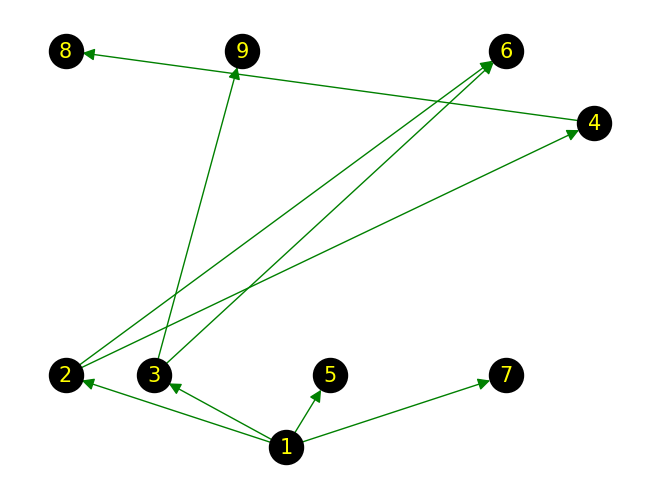

In [6]:
MyClass().draw_diagram()

# <font color='green'>Example 2 </font> 
##### non-transitive
(1, 1), (1, 2), (1, 3), (1, 4), (1, 5),  (1, 7), (1, 8), (1, 9), (2, 2), (2, 4), (2, 6),(2, 8), (3, 3), (3, 6), (3, 9),(4, 4), (4, 8), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)

In [7]:
MyClass().draw_diagram()

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
Reflexive check ✅
[(2, 1), (3, 1), (4, 1), (5, 1), (7, 1), (8, 1), (9, 1), (4, 2), (6, 2), (8, 2), (6, 3), (9, 3), (8, 4)]
Anti-Symmetric check ✅
Transitive check ❌
There is no (1,6) in the [1, 2, 3, 4, 5, 7, 8, 9]


'There are conditions that are not provided.'

<Figure size 640x480 with 0 Axes>

# Topological Sort

In [8]:
# Importing graphlib library
from graphlib import TopologicalSorter

## Example 1

In [9]:
graph = {"D": {"B", "C"}, "C": {"A"}, "B": {"A"}}
ts = TopologicalSorter(graph)
tuple(ts.static_order())

('A', 'C', 'B', 'D')

## Example 2

In [3]:
graph = {2: {3}, 3: {1}, 4: {0, 1}, 5: {0, 2}}

ts = TopologicalSorter(graph)
  
# printing the topological order
# returned by static_order()
print([*ts.static_order()])

[1, 0, 3, 4, 2, 5]


## Example 3: Men garment

In [4]:
graph = {
    "Jacket" : {"Belt", "Tie"},
    "Belt": {"Pants"},
    "Tie": {"Shirt"},
    "Left_Shoe": {"Left_Sock" , "Pants"},
    "Right_Shoe": {"Right_Sock" , "Pants"},
    "Pants" : {"Underwear", "Shirt"}
}
ts = TopologicalSorter(graph)
  
# printing the topological order
# returned by static_order()
print([*ts.static_order()])

['Shirt', 'Left_Sock', 'Right_Sock', 'Underwear', 'Tie', 'Pants', 'Belt', 'Left_Shoe', 'Right_Shoe', 'Jacket']
